In [1]:
import pandas as pd


In [3]:
df=pd.read_csv("C:\\Users\\pinka\\Digicrome\\Class\\Assignment\\student_success_dataset.csv")
print(df)

    student_id  age      gender socioeconomic_status  previous_gpa  \
0      STU0001   21  Non-binary                  Low          3.35   
1      STU0002   19        Male               Middle          4.00   
2      STU0003   21        Male                  Low          1.72   
3      STU0004   24  Non-binary               Middle          3.09   
4      STU0005   19      Female                  Low          2.24   
..         ...  ...         ...                  ...           ...   
495    STU0496   21  Non-binary                 High          2.50   
496    STU0497   17        Male               Middle          3.96   
497    STU0498   19      Female                  Low          3.15   
498    STU0499   17        Male                  Low          2.30   
499    STU0500   17  Non-binary                  Low          3.10   

     attendance_rate  participation_score  assignment_completion  \
0               0.73                 10.0                   63.8   
1               0.83   

In [5]:
#check for missing data 
df.isnull().sum()

student_id                  0
age                         0
gender                      0
socioeconomic_status        0
previous_gpa                0
attendance_rate             0
participation_score         0
assignment_completion       0
family_support              0
study_resources             0
study_hours_per_week        0
first_generation_student    0
program_of_study            0
digital_literacy            0
previous_course_failures    0
extracurricular_hours       0
work_hours_per_week         0
distance_from_campus        0
final_grade                 0
completed_course            0
dtype: int64

In [6]:
#corelation matrix
corr=df.corr(numeric_only=True)
print("Correlation Matrix : ",corr)

Correlation Matrix :                                 age  previous_gpa  attendance_rate  \
age                       1.000000     -0.066523         0.048503   
previous_gpa             -0.066523      1.000000        -0.010384   
attendance_rate           0.048503     -0.010384         1.000000   
participation_score      -0.064783     -0.005411        -0.010793   
assignment_completion    -0.073718     -0.054489        -0.034227   
study_hours_per_week     -0.051061     -0.086737         0.061913   
first_generation_student  0.011019      0.000919         0.042622   
digital_literacy         -0.092816      0.015181        -0.008238   
previous_course_failures  0.004830     -0.100756        -0.000157   
extracurricular_hours     0.021676      0.042339         0.018400   
work_hours_per_week       0.030240     -0.004625        -0.017160   
distance_from_campus     -0.009424      0.038194        -0.010457   
final_grade              -0.027188      0.316125         0.354536   
completed_co

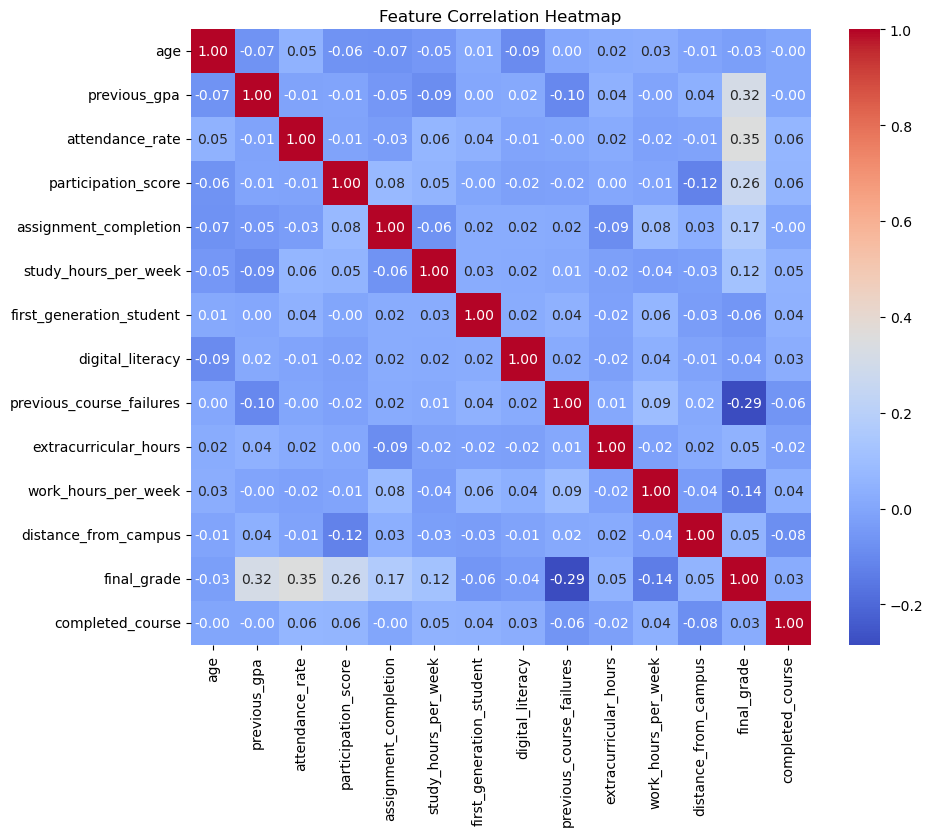

In [9]:
#Visual heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [27]:
columns_to_drop = [
    'gender',
    'distance_from_campus',
    'socioeconomic_status',
    'first_generation_student',
    'previous_course_failures'
]

# Filter only the columns that exist in df
existing_columns = [col for col in columns_to_drop if col in df.columns]

# Drop safely
df.drop(columns=existing_columns, inplace=True)

#get student_id 
col1=df.columns[0]
df[col1]=df[col1].astype(str)

#get family_support and map it
col7=df.columns[6]
df[col7]=df[col7].map({
    "High":1,
    "Medium":2,
    "Low":3
}).astype(int)

# get study_resources and map it.
col8=df.columns[7]
df[col8] = df[col8].map({
    'Textbooks, Online Resources':1,
    'Textbooks':2,
    'Textbooks, Tutoring' :3,
    'Minimal' :4,
    'Online Resources' :5,
    'Textbooks, Online Resources, Tutoring':6,
    'Textbooks, Online Resources, Study Group' :7,
    'Textbooks, Study Group' : 8,
    'Online Resources, Tutoring':9,
    'Online Resources, Study Group' : 10,
    'Textbooks, Online Resources, Tutoring, Study Group' :11,
    'Tutoring' :12,
    'Study Group' :13,
    'Textbooks, Tutoring, Study Group' :14,
    'Tutoring, Study Group' :15,
    'Online Resources, Tutoring, Study Group':16
}).astype(int)
#get program_of_study and map it.
col10=df.columns[9]
df[col10] = df[col10].map({
    'Economics' :1,
    'Data Science' :2,
    'Psychology' :3,
    'Mathematics' :4,
    'Liberal Arts' :5,
    'Computer Science' :6,
    'Engineering' :7,
    'Chemistry' :8,
    'Business':9,
    'Biology':10
}).astype(int)

df


,student_id,age,previous_gpa,attendance_rate,participation_score,assignment_completion,family_support,study_resources,study_hours_per_week,program_of_study,digital_literacy,extracurricular_hours,work_hours_per_week,final_grade,completed_course
0,STU0001,21,3.35,0.73,10.0,63.8,1,1,2.0,9,3.1,1.7,15,100,True
1,STU0002,19,4.00,0.83,6.2,45.7,2,6,4.0,6,5.8,3.1,0,100,True
2,STU0003,21,1.72,0.72,9.1,90.3,1,9,4.5,1,3.7,2.2,5,100,True
3,STU0004,24,3.09,0.81,6.5,58.9,1,6,5.1,4,6.2,2.9,22,100,True
4,STU0005,19,2.24,0.83,9.1,93.0,1,7,4.5,1,8.0,5.4,15,100,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,STU0496,21,2.50,0.85,9.1,75.1,2,2,6.0,6,8.6,1.6,0,100,True
496,STU0497,17,3.96,0.82,7.7,74.2,3,3,6.2,6,9.2,0.7,0,100,True
497,STU0498,19,3.15,0.77,6.4,60.4,1,4,6.7,3,7.6,6.6,4,100,True
498,STU0499,17,2.30,0.81,6.5,91.4,2,1,4.4,2,6.3,0.2,0,100,True


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
X_scaled = StandardScaler().fit_transform(df[num_cols])

pca = PCA(n_components=0.95)  # Preserve 95% of variance
X_pca = pca.fit_transform(X_scaled)

print(f"Original dimensions: {X_scaled.shape[1]}, After PCA: {X_pca.shape[1]}")


Original dimensions: 10, After PCA: 9


In [32]:
print(df.dtypes)

student_id                object
age                        int64
previous_gpa             float64
attendance_rate          float64
participation_score      float64
assignment_completion    float64
family_support             int32
study_resources            int32
study_hours_per_week     float64
program_of_study           int32
digital_literacy         float64
extracurricular_hours    float64
work_hours_per_week        int64
final_grade                int64
completed_course            bool
dtype: object
